<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [15]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
#install seaborn and wordcloud
%pip install seaborn wordcloud 

#import seaborn
import seaborn as sns
import wordcloud

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [20]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df["ConvertedComp"].value_counts()

ConvertedComp
2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
            ... 
79183.0        1
20475.0        1
288732.0       1
22056.0        1
19880.0        1
Name: count, Length: 3515, dtype: int64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


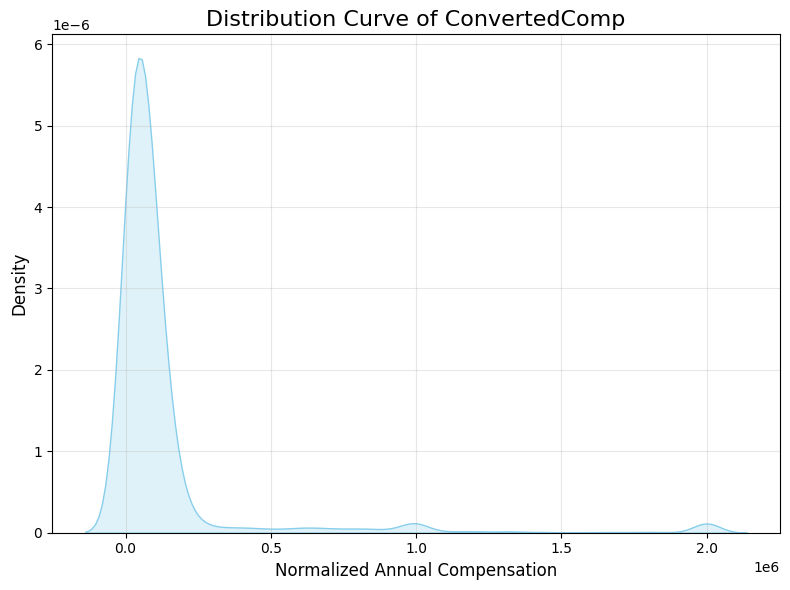

In [16]:
# your code goes here
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='ConvertedComp', fill=True, color='skyblue')
plt.title('Distribution Curve of ConvertedComp', fontsize=16)
plt.xlabel('Normalized Annual Compensation', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Plot the histogram for the column `ConvertedComp`.


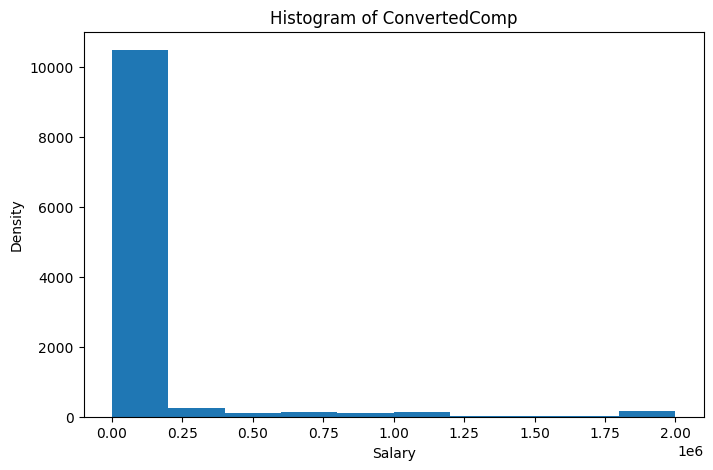

In [31]:
# your code goes here
# np.histogram returns 2 values
'''df["ConvertedComp"].replace(np.nan, 57745 , inplace=True)

count, bin_edges = np.histogram(df['ConvertedComp'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins'''

df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of ConvertedComp')
# add y-label
plt.ylabel('Density')
# add x-label
plt.xlabel('Salary')

plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [40]:
# your code goes here
dfm=df[df["Gender"]=='Man']
dfm["Gender"].value_counts()


Gender
Man    10480
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [36]:
# your code goes here
dfw=df[df["Gender"]=='Woman']
dfw["ConvertedComp"].median()


57745.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [60]:
# your code goes here
df["Age"].describe()


count    11398.000000
mean        30.759282
std          7.301019
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


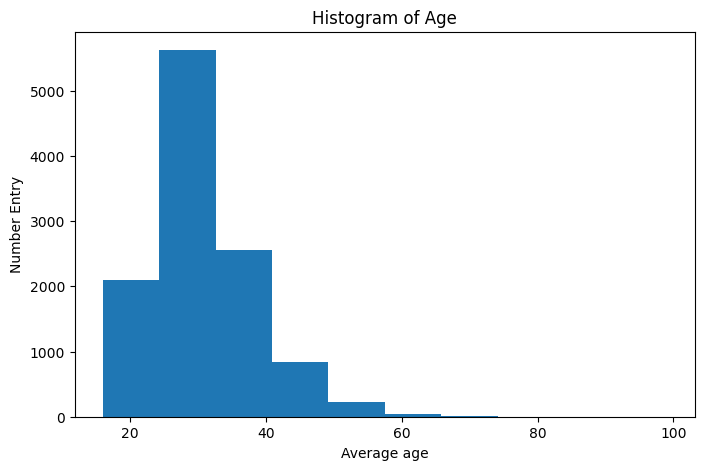

In [27]:
# your code goes here
'''count, bin_edges = np.histogram(df['Age'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins
'''

df['Age'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Age')
# add y-label
plt.ylabel('Number Entry')
# add x-label
plt.xlabel('Average age')

plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


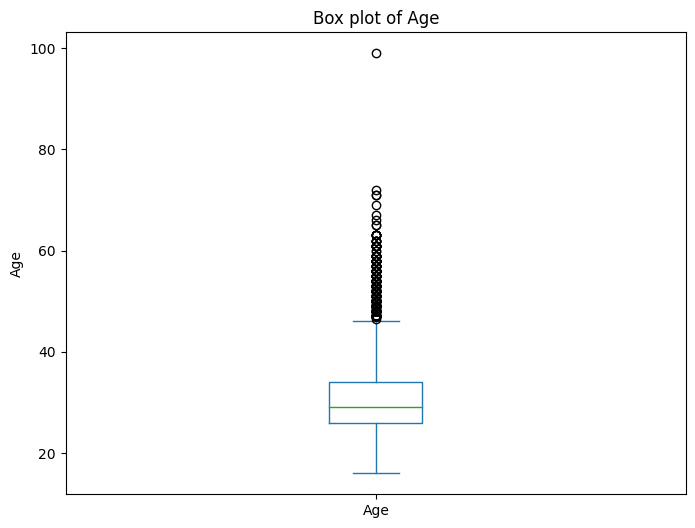

In [62]:
# your code goes here
df_CC=df["Age"]

df_CC.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Age')
plt.ylabel('Age')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [65]:
# your code goes here
df_filtered=df[df["Age"]>80]
df["ConvertedComp"].mean()

126309.57483769082

Find out the upper and lower bounds.


In [ ]:
# your code goes here


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [69]:
# your code goes here
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002468,-0.015314,0.004621,0.004119
CompTotal,-0.013490,1.000000,0.001031,0.003510,0.007063,0.007069
ConvertedComp,0.002468,0.001031,1.000000,0.020489,-0.034760,0.101821
WorkWeekHrs,-0.015314,0.003510,0.020489,1.000000,0.026517,0.036657
CodeRevHrs,0.004621,0.007063,-0.034760,0.026517,1.000000,-0.020239
Age,0.004119,0.007069,0.101821,0.036657,-0.020239,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
